In [22]:
# p203 사람얼굴
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np

In [13]:
people = fetch_lfw_people(min_faces_per_person=5, resize=0.7) # 다운로드

In [14]:
people.target.shape, len(set(people.target_names)), people.images.shape

((1511,), 52, (1511, 87, 65))

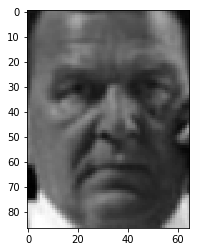

In [16]:
plt.imshow(people.images[0], cmap='gray')

In [17]:
#(87 * 65) 이상의 명암을 주성부 100 (10 * 10)개 변환해서 시각화
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=10*10, whiten=True).fit(people.data)

In [20]:
pca_x = pca.transform(people.data)

In [21]:
people.data.shape, pca_x.shape

((1511, 5655), (1511, 100))

In [29]:
img = pca.components_.reshape([100,87,65]) # 주성분수, 높이, 너비
img.shape

(100, 87, 65)

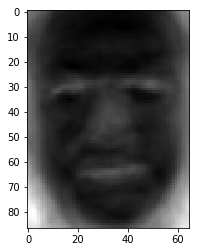

In [31]:
plt.imshow(img[0], cmap='gray')

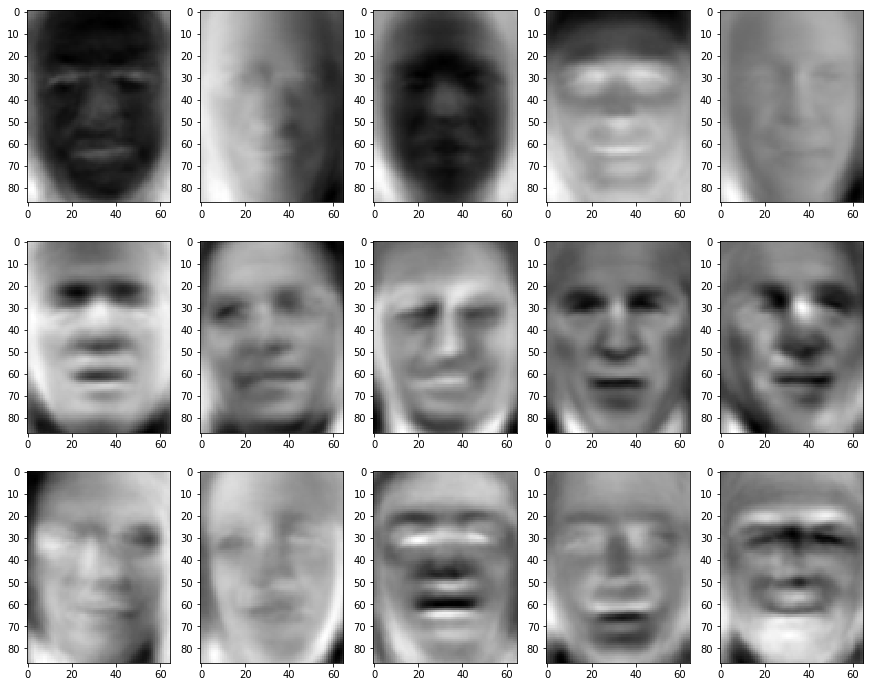

In [33]:
h,w =3,5
fig, ax = plt.subplots(3, 5, figsize=(15,12))
for y in range(h):
    for x in range(w):
        ax[y,x].imshow(img[y*5+x], cmap='gray')

### ==================================================================

In [35]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

In [36]:
x = people.data
y = people.target
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [38]:
model = RidgeClassifier().fit(X_train, y_train)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [39]:
model.score(X_train, y_train), model.score(X_test, y_test)    

(1.0, 0.43915343915343913)

In [40]:
model = RidgeClassifier(alpha=10).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=1.55499e-09): result may not be accurate.
  overwrite_a=False)


(1.0, 0.4417989417989418)

오버피팅!!! PCA 해서 다시 도전

In [41]:
pca = PCA(n_components=10*10, whiten=True).fit(people.data) # whiten 정규화

In [42]:
pca_x = pca.transform(people.data)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(pca_x,y)
model = RidgeClassifier(alpha=1).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.6593115622241836, 0.5608465608465608)